

---
## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

Goal is not only to make a prediction for a person smoking status, it is to make a prediction with the best possible way. So will be building, evaluating, and improving  model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [ ]:
#Test Your Zaka
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [ ]:
#Test Your Zaka
# clone git repo
!git clone https://github.com/zaka-ai/medical-cost-prediction

# change working directory
%cd medical-cost-prediction/data/

# read CSV file
data = pd.read_csv('insurance.csv')

# display head
data.head(5)

Cloning into 'medical-cost-prediction'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 18 (delta 2), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/medical-cost-prediction/data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [ ]:
#Test Your Zaka 
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns")

There are 1338 rows and 7 columns


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
#Test Your Zaka
data.info()
## we have just 3 missing values for the bmi
## we have (bmi and charges) as type float, (age, children) as type integer, (sex, smoker, region) as type object
## memory used > 73.3 KB
## 1338 rows and 1337 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
#Test Your Zaka
data.describe()

,age,bmi,children,charges
count,1338.000000,1335.000000,1338.000000,1338.000000
mean,39.207025,30.661423,1.094918,13270.422265
std,14.049960,6.101038,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.687500,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

Smokers count= 274 
Non_smokers count= 1064


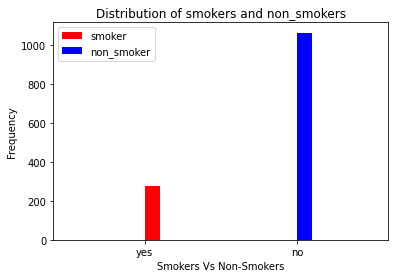

In [ ]:
#Test Your Zaka

# select smokers 
smokers = data[(data.smoker == "yes")]
smokers_count=len(smokers)

# select non smokers
non_smokers = data[(data.smoker == "no")]
non_smokers_count=len(non_smokers)

print(f"Smokers count= {smokers_count} \nNon_smokers count= {non_smokers_count}")

plt.hist(smokers['smoker'], color='r', label='smoker')
plt.hist(non_smokers['smoker'], color='b', label='non_smoker')
plt.title("Distribution of smokers and non_smokers")
plt.xlabel("Smokers Vs Non-Smokers")
plt.ylabel("Frequency")
plt.legend()
plt.show()


We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case. 

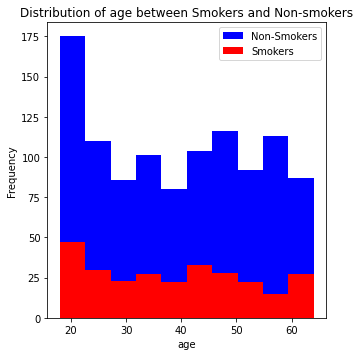

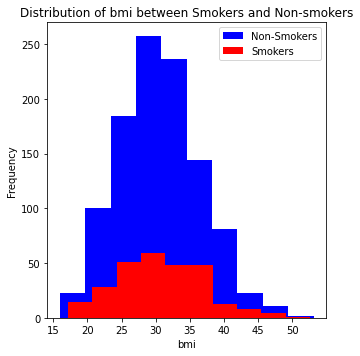

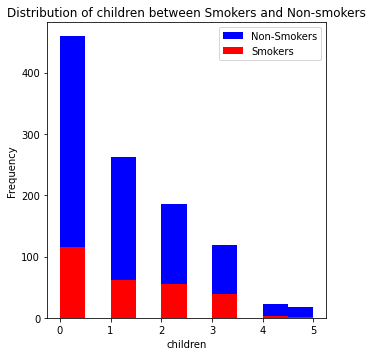

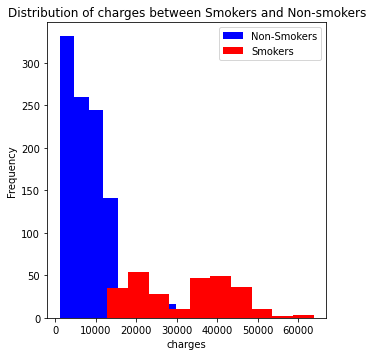

In [ ]:
#Test Your Zaka
num_features=data.describe().keys()
for i in range(len(num_features)):
    plt.figure(figsize=(5,25)) 
    plt.subplot(len(num_features),1,i+1)   
    plt.hist(non_smokers[num_features[i]], color='b',label="Non-Smokers")
    plt.hist(smokers[num_features[i]], color='r', label="Smokers")
    plt.title(f"Distribution of {num_features[i]} between Smokers and Non-smokers")
    plt.xlabel(num_features[i])
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

WHat do you think is the feature that tells us the most about a person being smoker or not?

**"Charges" is the feature that tell us the most about a person being a smoker or not, as there is a huge difference between the amounts paid by non-smokers(mean around 8434) vs smokers(mean around 32050)**

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

smoker   no  yes
sex             
female  547  115
male    517  159


Text(0.5, 1.0, 'Smoking Status According to Genders')

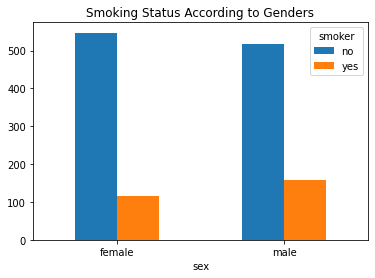

In [ ]:
#Test Your Zaka
# Creating crosstab
crosstb = pd.crosstab(data["sex"],data["smoker"])
print(crosstb)
# Creating barplot
barplot = crosstb.plot.bar(rot=0)
barplot.set_title('Smoking Status According to Genders')

Do you think the gender has an effect on smoking according to your results?

**Gender has slight effect on smoking since the percentages of being smoker or not for females and males are close to each other**

Do the same for the column 'region'

smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


Text(0.5, 1.0, 'Smoking Status According to Regions')

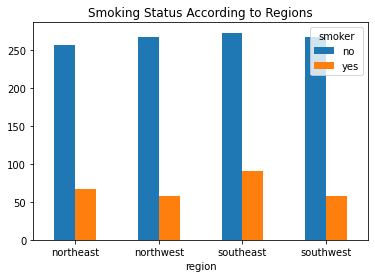

In [ ]:
#Test Your Zaka
# Creating crosstab
crosstb2 = pd.crosstab(data["region"],data["smoker"])
print(crosstb2)
# Creating barplot
barplot = crosstb2.plot.bar(rot=0)
barplot.set_title('Smoking Status According to Regions')

**Region has no important effect on smoking status either**

## 3. Data Preprocessing
"Garbage in, garbage out". 

Data should be preprocessed and cleaned to get rid of noisy data. 
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [ ]:
#Test Your Zaka
data.isnull().sum()
#only 3 missing values for bmi

age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Drop rows with missing values, and make sure you have no nulls anymore.

In [ ]:
#Test Your Zaka
data=data.dropna()
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

See the type of each of your columns

In [ ]:
#Test Your Zaka
data.info()
## age, bmi, children,charges are numerical features
## sex, region are categorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1335 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1335 non-null   int64  
 1   sex       1335 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1335 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1335 non-null   object 
 6   charges   1335 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [ ]:
#Test Your Zaka
data['sex'].replace({"male":0, "female":1}, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


And now the smokers column

In [ ]:
#Test Your Zaka
data['smoker'].replace({"no":0,"yes":1}, inplace=True)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


And now the Region Column

In [ ]:
#Test Your Zaka
print(data["region"].value_counts())
data["region"].replace({"southeast":0,"northwest":1,"northeast":2,"southwest":3}, inplace=True)
data.head()

southeast    364
northwest    324
northeast    324
southwest    323
Name: region, dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


#### Normalization

Let's scale all the columns by dividing by the maximum

In [ ]:
#Test Your Zaka
max_val=data.max()
data=data.divide(max_val)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,1.0,0.525127,0.0,1.0,1.000000,0.264777
1,0.281250,0.0,0.635611,0.2,0.0,0.000000,0.027059
2,0.437500,0.0,0.621118,0.6,0.0,0.000000,0.069773
3,0.515625,0.0,0.427348,0.0,0.0,0.333333,0.344744
4,0.500000,0.0,0.543572,0.0,0.0,0.333333,0.060637


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [ ]:
#Test Your Zaka
x=data.iloc[:,[0,2,3,6]].values # i will remove region since it doesn't have any impact on smoking decision
y=data.iloc[:,4].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1068, 4) (1068,)
(267, 4) (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [ ]:
#Test Your Zaka
logist=LogisticRegression()
logist.fit(x_train, y_train)
print('Model is trained!')

Model is trained!


#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [ ]:
#Test Your Zaka
from sklearn import metrics
logist_pred=logist.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(y_test,logist_pred).ravel()
print(f"True Negative: {TN} \nFalse Positive: {FP} \nFalse Negative: {FN} \nTrue Positive: {TP}" )

logist_acc=(TN+TP)/len(y_test)
logist_prec=TP/(TP+FP)
logist_recall=TP/(TP+FN)
logist_f1=(2*logist_prec*logist_recall)/(logist_prec+logist_recall)

print(f"Accuracy: {logist_acc} \nPrecision: {logist_prec} \nRecall: {logist_recall} \nF1 Score: {logist_f1}")


True Negative: 200 
False Positive: 2 
False Negative: 25 
True Positive: 40
Accuracy: 0.898876404494382 
Precision: 0.9523809523809523 
Recall: 0.6153846153846154 
F1 Score: 0.7476635514018692


Which metrics you think can be improved?

**Recall should be improved since it is just 61% (F1 score is directly linked to it). As we can see False negative is high (25) wrt to other metrics due to data imbalance (smokers have low distribution in comparison with non_smokers) thus our model performs pretty well for non_smokers however it didn't learnt enough to predict smoker case**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

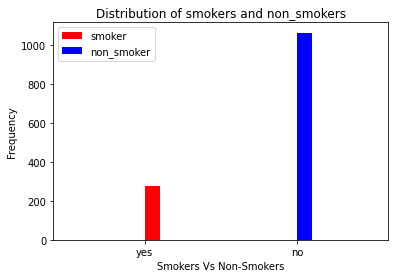

In [ ]:
#Test Your Zaka
plt.hist(smokers['smoker'], color='r', label='smoker')
plt.hist(non_smokers['smoker'], color='b', label='non_smoker')

plt.title("Distribution of smokers and non_smokers")
plt.xlabel("Smokers Vs Non-Smokers")
plt.ylabel("Frequency")
plt.legend()
plt.show()

We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [ ]:
#Test Your Zaka
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

over = RandomOverSampler(sampling_strategy=0.5) 
x_new, y_new = over.fit_resample(x,y)

under = RandomUnderSampler()
x_new, y_new =under.fit_resample(x_new,y_new)
print(f"Data is now balanced with {len(x_new)} instances with equal smoking/non_smoking distributions")

Data is now balanced with 1060 instances with equal smoking/non_smoking distributions


Plot a new histogram on the new data we have.

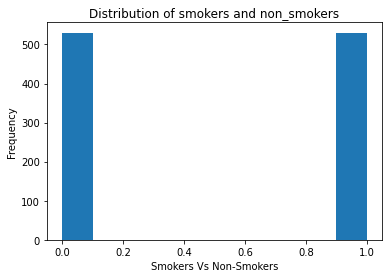

In [ ]:
#Test Your Zaka
plt.hist(y_new)
plt.title("Distribution of smokers and non_smokers")
plt.xlabel("Smokers Vs Non-Smokers")
plt.ylabel("Frequency")
plt.show()

Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [ ]:
#Test Your Zaka
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_new,y_new, test_size=0.2, random_state=42)

print(f"Training samples: {y_train2.shape[0]} \nTesting samples:{y_test2.shape[0]}")
logist=LogisticRegression()
logist.fit(x_train2, y_train2)

Training samples: 848 
Testing samples:212


LogisticRegression()

Asses your model on the testing data, and Compute the same metrics you computed before

In [ ]:
#Test Your Zaka
logist_pred2=logist.predict(x_test2)

TN2, FP2, FN2, TP2 = confusion_matrix(y_test2,logist_pred2).ravel()
print(f"\nTrue Negative: {TN2} \nFalse Positive: {FP2} \nFalse Negative: {FN2} \nTrue Positive: {TP2}" )

logist_acc2=(TN2+TP2)/len(y_test2)
logist_prec2=TP2/(TP2+FP2)
logist_recall2=TP2/(TP2+FN2)
logist_f12=(2*logist_prec2*logist_recall2)/(logist_prec2+logist_recall2)
print(f"\nAccuracy: {logist_acc2} \nPrecision: {logist_prec2} \nRecall: {logist_recall2} \nF1 Score: {logist_f12}")


True Negative: 106 
False Positive: 7 
False Negative: 0 
True Positive: 99

Accuracy: 0.9669811320754716 
Precision: 0.9339622641509434 
Recall: 1.0 
F1 Score: 0.9658536585365853


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1', 'l2'], 'C':[0.1, 1, 10, 100, 1000],'solver':['liblinear']}
Logist_Reg= LogisticRegression()
Reg_Model= GridSearchCV(Logist_Reg, parameters,cv = 5)
Reg_Model.fit(x_train2, y_train2)

op_index=np.argmax(np.array(Reg_Model.cv_results_['mean_test_score']))
print(f"Max Mean Score {Reg_Model.cv_results_['mean_test_score'][op_index]} \nC= {Reg_Model.cv_results_['param_C'][op_index]} \nPenalty= {Reg_Model.cv_results_['param_penalty'][op_index]}")

Max Mean Score 0.9669683257918551 
C= 10 
Penalty= l1


Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [ ]:
#Test Your Zaka
Logist_L1= LogisticRegression(penalty='l1',C=10,solver='liblinear')
Logist_L1.fit(x_train2,y_train2)
Logist_L1_pred=Logist_L1.predict(x_test2)

logist_L1_acc=metrics.accuracy_score(y_test2, Logist_L1_pred)
logist_L1_prec=metrics.precision_score(y_test2, Logist_L1_pred)
logist_L1_recall=metrics.recall_score(y_test2, Logist_L1_pred)
logist_L1_f1=metrics.f1_score(y_test2, Logist_L1_pred)

print(f"Accuracy: {logist_L1_acc} \nPrecision: {logist_L1_prec} \nRecall: {logist_L1_recall} \nF1 Score: {logist_L1_f1}")

Accuracy: 0.9858490566037735 
Precision: 0.9705882352941176 
Recall: 1.0 
F1 Score: 0.9850746268656716


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week. 
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [ ]:
#Test Your Zaka
from sklearn.ensemble import AdaBoostClassifier

Adaboost_cls=AdaBoostClassifier(n_estimators=10)
Adaboost_cls.fit(x_train2,y_train2)

AdaBoostClassifier(n_estimators=10)

Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [ ]:
#Test Your Zaka
Adaboost_pred=Adaboost_cls.predict(x_test2)

Adaboost_acc=metrics.accuracy_score(y_test2, Adaboost_pred)
Adaboost_prec=metrics.precision_score(y_test2, Adaboost_pred)
Adaboost_recall=metrics.recall_score(y_test2, Adaboost_pred)
Adaboost_f1=metrics.f1_score(y_test2, Adaboost_pred)

print(f"\nAccuracy: {Adaboost_acc} \nPrecision: {Adaboost_prec} \nRecall: {Adaboost_recall} \nF1 Score: {Adaboost_f1}")


Accuracy: 0.9764150943396226 
Precision: 0.9607843137254902 
Recall: 0.98989898989899 
F1 Score: 0.9751243781094527
